# Game Theory

A simple game theoretic approach to reserve pricing, inspired by Jackson, Leyton-Brown & Shoham's *Game Theory Course,* Optimal Auctions. [Link.](http://www.cs.ubc.ca/~cs532l/gt2/slides/11-6.pdf)


## Imports and Constants

In [1]:
import utilities.engine as engine
import utilities.strategies as strategies
import utilities.tools as tools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
TEST_FILE = 'raw-data/part-00127'

## Strategies 

### No Price Floor

109.47738216029029


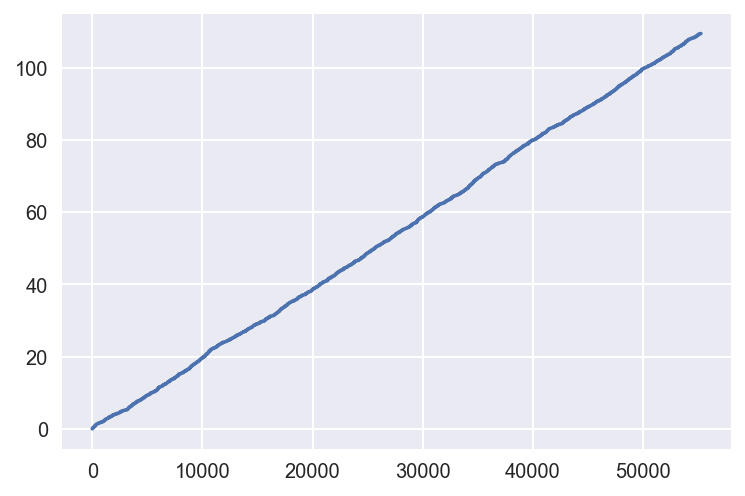

size: 55240
mean: 0.842
range: [0.0, 11.0]
var: 0.768



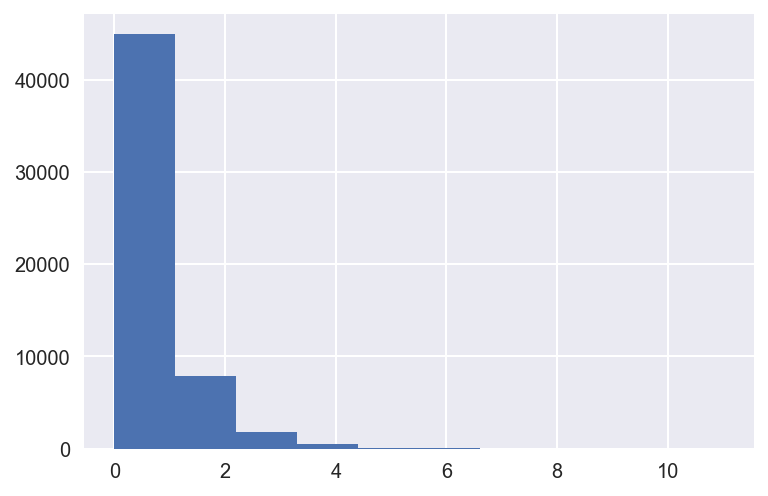

In [3]:
# Running simulation with no price flooe
test = strategies.Constant()
simulator = engine.Simulator(test)

data_stream = tools.get_file_stream(TEST_FILE)
simulator.run_auction_series(data_stream)

baseline_profit = sum(simulator.revenues)
time = np.arange(simulator.steps)
total_money = np.cumsum(simulator.revenues)

print(baseline_profit)
plt.plot(time, total_money)
plt.show()

tools.describe(simulator.bidders)
plt.hist(simulator.bidders)
plt.show()

### Constant Price Floor

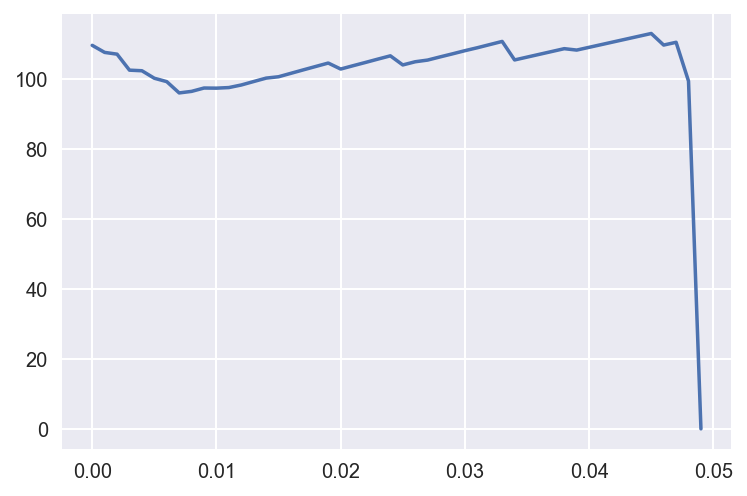

In [4]:
resulting_profit = []
price_floors = np.arange(0.0, 0.05, 0.001)
for floor in price_floors:
    test = strategies.Constant(floor)
    result = engine.Simulator.auto_file_run(test, TEST_FILE)
    profit = sum(result.revenues)
    resulting_profit.append(profit)
plt.plot(price_floors, resulting_profit)
plt.show()

In [5]:
maximum_index = np.argmax(resulting_profit)
maximum_profit = resulting_profit[maximum_index]
best_constant_floor = price_floors[maximum_index]
print(best_constant_floor, maximum_profit)

0.045 112.859235774


In [6]:
test = strategies.Constant(best_constant_floor)
result = engine.Simulator.auto_file_run(test, TEST_FILE)
tools.reload(tools)
tools.describe(result.reserve_prices)
tools.describe(result.reserve_times)

size: 55240
mean: 0.045
range: [0.045, 0.045]
var: 4.81e-35

size: 55240
mean: 4.92e-07
range: [3.52e-07, 3.66e-05]
var: 1.35e-13



### Game Theoretic Approach

In [ ]:
# Mean Approach
test = strategies.GameTheory(window_length=30, fraction=0.5)
result = engine.Simulator.auto_file_run(test, TEST_FILE)
sum(result.revenues)

tools.describe(result.reserve_prices)
tools.describe(result.reserve_times)

size: 55240
mean: 0.0028
range: [0.0, 0.00814]
var: 1.61e-06

size: 55240
mean: 1.16e-06
range: [5.12e-07, 0.000113]
var: 1.47e-12



In [ ]:
resulting_profit = []
fractions = np.arange(0.0, 0.72, 0.03)
for fraction in fractions:
    test = strategies.GameTheory(30, fraction)
    result = engine.Simulator.auto_file_run(test, TEST_FILE)
    profit = sum(result.revenues)
    resulting_profit.append(profit)
plt.plot(fractions, resulting_profit)
plt.show()

In [ ]:
maximum_index = np.argmax(resulting_profit)
maximum_profit = resulting_profit[maximum_index]
best_fraction = price_floors[maximum_index]
print(best_fraction, maximum_profit)

### GameTheoryPerID

In [16]:
tools.reload(strategies, engine)
ADVERTISER_ID =  'advertiser_id'
test = strategies.GameTheoryPerID(minimum_length=20,
                                  fraction=0.1,
                                  attribute_id=ADVERTISER_ID,
                                  static=0.045)
result = engine.Simulator.auto_file_run(test, TEST_FILE)
print(sum(result.revenues))

tools.describe(result.reserve_prices)
tools.describe(result.reserve_times)

109.50382630903349
size: 55240
mean: 0.0028
range: [2e-06, 0.045]
var: 0.000107

size: 55240
mean: 1.04e-06
range: [5.97e-07, 0.000135]
var: 6.78e-13



### Brute Force Optimization